# Importing Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Import Data

In [2]:
train_data = pd.read_csv("../datasets/train.csv")
test_data = pd.read_csv("../datasets/test.csv")

In [32]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
test_data.info()

# Handling Missing Values 

## 1. `LotFrontage`

**LotFrontage**: Linear feet of street connected to property

C:\Users\hcham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


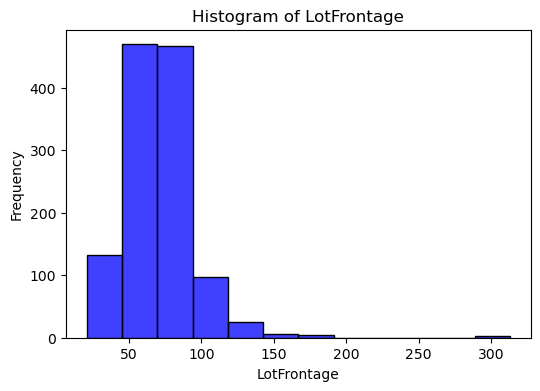

69.0


In [3]:
bins = int(np.ceil(np.log2(1460) + 1))

plt.figure(figsize=(6, 4))
sns.histplot(train_data["LotFrontage"],bins=bins,kde=False,color="blue")
plt.xlabel("LotFrontage")
plt.ylabel("Frequency")
plt.title('Histogram of LotFrontage')
plt.show()

median_value = train_data['LotFrontage'].median()
print(median_value)

### Imputing Missing Values in `LotFrontage` using Median

In [4]:
median_value = train_data['LotFrontage'].median()
train_data['LotFrontage'] = train_data['LotFrontage'].fillna(median_value)
test_data['LotFrontage'] = test_data['LotFrontage'].fillna(median_value)

C:\Users\hcham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


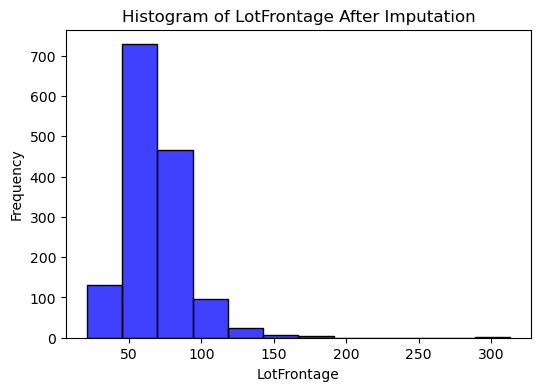

69.0


In [6]:
bins = int(np.ceil(np.log2(1460) + 1))

plt.figure(figsize=(6, 4))
sns.histplot(train_data["LotFrontage"],bins=bins,kde=False,color="blue")
plt.xlabel("LotFrontage")
plt.ylabel("Frequency")
plt.title('Histogram of LotFrontage After Imputation')
plt.show()

median_value = train_data['LotFrontage'].median()
print(median_value)

## 2. `Alley`

In [8]:
train_data['Alley'] = train_data['Alley'].fillna("No Alley")
test_data['Alley'] = test_data['Alley'].fillna("No Alley")

## 3. `MasVnrType` and `MasVnrArea`

In [25]:
print(train_data["MasVnrType"].unique())
print(test_data["MasVnrType"].unique())

['BrkFace' 'No MasVnr' 'Stone' 'BrkCmn' nan]
['No MasVnr' 'BrkFace' 'Stone' 'BrkCmn' nan]


C:\Users\hcham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


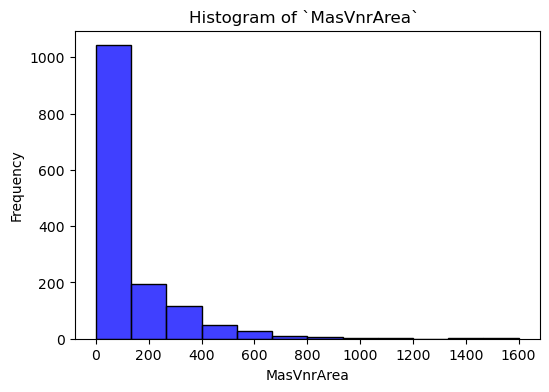

0.0


In [18]:
bins = int(np.ceil(np.log2(1460) + 1))
plt.figure(figsize=(6,4))
sns.histplot(train_data["MasVnrArea"],bins=bins,kde=False,color="blue")
plt.xlabel("MasVnrArea")
plt.ylabel("Frequency")
plt.title('Histogram of `MasVnrArea` ')
plt.show()

median_value = train_data['MasVnrArea'].median()
print(median_value)

In [30]:
count_zero_mas_vnr_area = train_data[train_data['MasVnrArea'] == 0].shape[0]
print(f"Number of rows where 'MasVnrArea' equals 0: {count_zero_mas_vnr_area}")

Number of rows where 'MasVnrArea' equals 0: 869


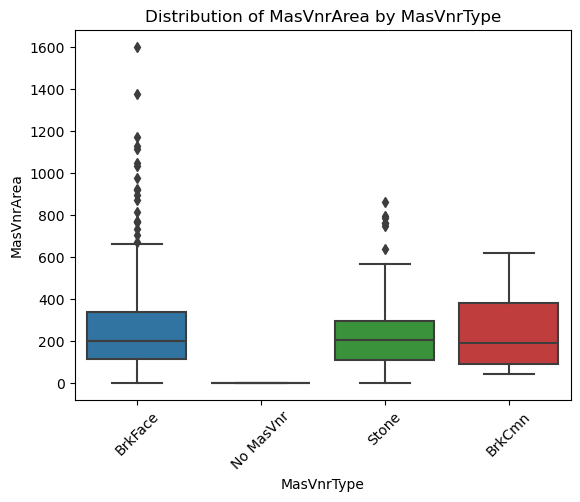

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=train_data, x='MasVnrType', y='MasVnrArea')
plt.title("Distribution of MasVnrArea by MasVnrType")
plt.xticks(rotation=45)
plt.show()


In [29]:
# Impute "No MasVnr" where "MasVnrArea" equals 0 and "MasVnrType" is NaN
train_data.loc[(train_data['MasVnrArea'] == 0) & (train_data['MasVnrType'].isnull()), 'MasVnrType'] = 'No MasVnr'
test_data.loc[(test_data['MasVnrArea'] == 0) & (test_data['MasVnrType'].isnull()), 'MasVnrType'] = 'No MasVnr'

# Impute "No MasVnr" to "MasVnrType" and 0 to "MasVnrArea"  where "MasVnrArea" is NaN and "MasVnrType" is NaN
train_data.loc[(train_data['MasVnrArea'].isnull()) & (train_data['MasVnrType'].isnull()), ['MasVnrArea', 'MasVnrType']] = [0, 'No MasVnr']
test_data.loc[(test_data['MasVnrArea'].isnull()) & (test_data['MasVnrType'].isnull()), ['MasVnrArea', 'MasVnrType']] = [0, 'No MasVnr']

In [44]:
missing_values_count = train_data['MasVnrType'].isnull().sum()
print(f"MasVnrType(train) - {missing_values_count}")
missing_values_count = test_data['MasVnrType'].isnull().sum()
print(f"MasVnrType(test) - {missing_values_count}")

missing_values_count = train_data['MasVnrArea'].isnull().sum()
print(f"MasVnrArea(train) - {missing_values_count}")
missing_values_count = test_data['MasVnrArea'].isnull().sum()
print(f"MasVnrArea(test) - {missing_values_count}")

MasVnrType(train) - 0
MasVnrType(test) - 0
MasVnrArea(train) - 0
MasVnrArea(test) - 0


In [43]:
train_data = train_data.dropna(subset=['MasVnrType'])
test_data = test_data.dropna(subset=['MasVnrType'])